# Hyperparameter Optimization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor

from scipy import stats
from skopt import BayesSearchCV
from skopt.space import Real, Categorical

In [3]:
# Globals
ORANGE = '#F2BE4A'
RED = '#ef4123'
GRAY = '#545453'

### Prepare data

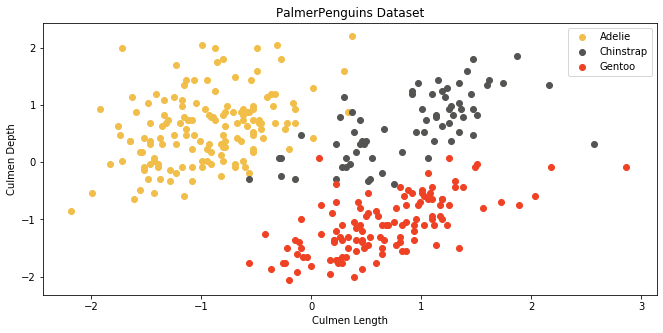

In [4]:
data = pd.read_csv('./data/penguins_size.csv')

data = data.dropna()
data = data.drop(['sex', 'island', 'flipper_length_mm', 'body_mass_g'], axis=1)

X = data.drop(['species'], axis=1)

ss = StandardScaler()
X = ss.fit_transform(X) 

y = data['species']
spicies = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
y = [spicies[item] for item in y]
y = np.array(y) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

plt.figure(figsize=(11, 5))

plt.title("PalmerPenguins Dataset")
plt.xlabel('Culmen Length')
plt.ylabel('Culmen Depth')

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color=ORANGE, label='Adelie')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color=GRAY, label='Chinstrap')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color=RED, label='Gentoo')

plt.legend();

### Grid Search

In [5]:
hyperparameters = {
    'C': [0.1, 1, 100, 500, 1000],
    'gamma': [0.0001, 0.001, 0.01, 0.005, 0.1, 1, 3, 5],
    'kernel': ('linear', 'rbf')
}

grid = GridSearchCV(
        estimator=SVC(),
        param_grid=hyperparameters,
        cv=5, 
        scoring='f1_micro', 
        n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 500, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.005, 0.1, 1, 3, 5],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_micro', verbose=0)

In [6]:
print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')

Best parameters: {'C': 500, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: 0.9626834381551361


In [7]:
print(f'All results: {grid.cv_results_}')

All results: {'mean_fit_time': array([0.00100007, 0.00119963, 0.00019999, 0.00159988, 0.00079994,
       0.00140004, 0.00060148, 0.00140018, 0.00019984, 0.0010004 ,
       0.00080004, 0.00099988, 0.0006    , 0.00159988, 0.00040002,
       0.00220037, 0.00040026, 0.00140009, 0.00060005, 0.00120029,
       0.00060291, 0.00100064, 0.0006001 , 0.00119944, 0.00079994,
       0.00059996, 0.00039978, 0.00099993, 0.00039992, 0.00119987,
       0.00039992, 0.00140004, 0.00100012, 0.00100002, 0.00059991,
       0.00220003, 0.00059996, 0.00060019, 0.00060029, 0.00159941,
       0.00079985, 0.00059981, 0.00100002, 0.00060039, 0.00059991,
       0.00100007, 0.00140014, 0.00139952, 0.00100026, 0.00060015,
       0.00239987, 0.00219994, 0.00339994, 0.00059986, 0.00120044,
       0.00080004, 0.00099969, 0.00080032, 0.00120006, 0.00100007,
       0.00119967, 0.00139956, 0.00099998, 0.00159955, 0.01039968,
       0.00059962, 0.00160007, 0.0033998 , 0.00140085, 0.00120025,
       0.00460005, 0.00220003, 

In [9]:
model = SVC(C=500, gamma = 0.1, kernel = 'rbf')
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.92      0.92      0.92        13
           2       0.97      1.00      0.98        31

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67



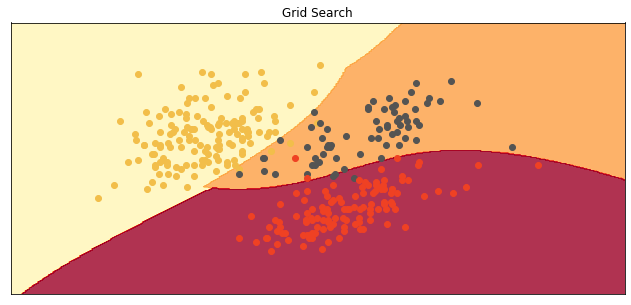

In [14]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
plt.figure(figsize=(11, 20))


plt.subplot(3, 1, 1)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='YlOrRd', alpha=0.8)

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color=ORANGE, label='Adelie')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color=GRAY, label='Chinstrap')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color=RED, label='Gentoo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Grid Search')

plt.show()

### Random Search

In [15]:
hyperparameters = {
    "C": stats.uniform(500, 1500),
    "gamma": stats.uniform(0, 1),
    'kernel': ('linear', 'rbf')
}

random = RandomizedSearchCV(
                estimator = SVC(), 
                param_distributions = hyperparameters, 
                n_iter = 100, 
                cv = 3, 
                random_state=42, 
                n_jobs = -1)

random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C6A0CEBAC8>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C6A0CEB848>,
                                        'kernel': ('linear', 'rbf')},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [16]:
print(f'Best parameters: {random.best_params_}')
print(f'Best score: {random.best_score_}')

Best parameters: {'C': 510.5994578295761, 'gamma': 0.023062425041415757, 'kernel': 'linear'}
Best score: 0.9700374531835205


In [17]:
print(f'All results: {random.cv_results_}')

All results: {'mean_fit_time': array([0.00199978, 0.00100001, 0.0006783 , 0.00165439, 0.00099039,
       0.00066694, 0.00066598, 0.00099595, 0.00100422, 0.00133316,
       0.0019993 , 0.0019997 , 0.00200073, 0.00033291, 0.00200033,
       0.00066725, 0.00133284, 0.00067647, 0.00065112, 0.00166678,
       0.00166655, 0.00199501, 0.0019997 , 0.00166702, 0.0013334 ,
       0.0006667 , 0.00199978, 0.00233388, 0.00099937, 0.0006667 ,
       0.00166607, 0.00033315, 0.00133316, 0.00100025, 0.0006667 ,
       0.001333  , 0.00133348, 0.00099985, 0.0016667 , 0.0016671 ,
       0.00066646, 0.00166647, 0.00133332, 0.00133308, 0.00099993,
       0.00199978, 0.00066606, 0.00133348, 0.0019997 , 0.00233308,
       0.00233348, 0.00166678, 0.00166647, 0.00166686, 0.0019997 ,
       0.00099961, 0.00266719, 0.00133308, 0.00099993, 0.00100001,
       0.001333  , 0.00066678, 0.00166663, 0.00099977, 0.00066694,
       0.00066654, 0.00066582, 0.00066622, 0.00200009, 0.0023334 ,
       0.00099977, 0.00166678, 

In [19]:
model = SVC(C=510.5994578295761, gamma = 0.023062425041415757, kernel = 'linear')
model.fit(X_train, y_train)

preditions = model.predict(X_test)
print(metrics.classification_report(y_test, preditions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.92      0.92      0.92        13
           2       0.97      1.00      0.98        31

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67



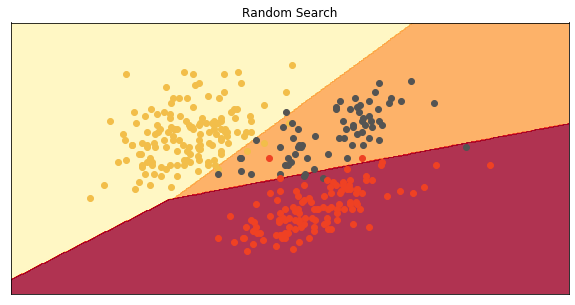

In [20]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
plt.figure(figsize=(10, 20))


plt.subplot(3, 1, 1)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='YlOrRd', alpha=0.8)

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color=ORANGE, label='Adelie')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color=GRAY, label='Chinstrap')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color=RED, label='Gentoo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Random Search')

plt.show()

### Bayesian Optimization

In [21]:
hyperparameters = {
    "C": Real(1e-6, 1e+6, prior='log-uniform'),
    "gamma": Real(1e-6, 1e+1, prior='log-uniform'),
    "kernel": Categorical(['linear', 'rbf']),
}

bayesian = BayesSearchCV(
                estimator = SVC(), 
                search_spaces = hyperparameters, 
                n_iter = 100, 
                cv = 5, 
                random_state=42, 
                n_jobs = -1)

bayesian.fit(X_train, y_train)

G:\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
G:\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BayesSearchCV(cv=5, error_score='raise',
              estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                            class_weight=None, coef0=0.0,
                            decision_function_shape='ovr', degree=3,
                            gamma='scale', kernel='rbf', max_iter=-1,
                            probability=False, random_state=None,
                            shrinking=True, tol=0.001, verbose=False),
              fit_params=None, iid=True, n_iter=100, n_jobs=-1, n_points=1,
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=42,
              refit=True, return_train_score=False, scoring=None,
              search_spaces={'C': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='identity'),
                             'gamma': Real(low=1e-06, high=10.0, prior='log-uniform', transform='identity'),
                             'kernel': Categorical(categories=('linear', 'rbf'), prior=None)},
              verbose

In [22]:
print(f'Best parameters: {bayesian.best_params_}')
print(f'Best score: {bayesian.best_score_}')

Best parameters: OrderedDict([('C', 3932.2516133086), ('gamma', 0.0011646737978730447), ('kernel', 'rbf')])
Best score: 0.9625468164794008


In [23]:
print(f'All results: {bayesian.cv_results_}')

All results: defaultdict(<class 'list'>, {'split0_test_score': [0.9629629629629629, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.46296296296296297, 0.9444444444444444, 0.8703703703703703, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.8703703703703703, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.46296296296296297, 0.8703703703703703, 0.9444444444444444, 0.7962962962962963, 0.46296296296296297, 0.9629629629629629, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.8703703703703703, 0.9444444444444444, 0.46296296296296297, 0.9444444444444444, 0.9629629629629629, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9629629629629629, 0.9444444444

In [24]:
model = SVC(C=3932.2516133086, gamma = 0.0011646737978730447, kernel = 'rbf')
model.fit(X_train, y_train)

preditions = model.predict(X_test)
print(metrics.classification_report(y_test, preditions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.92      0.96        13
           2       0.97      1.00      0.98        31

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



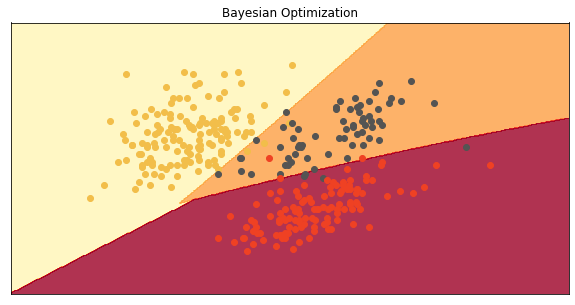

In [25]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
plt.figure(figsize=(10, 20))


plt.subplot(3, 1, 1)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='YlOrRd', alpha=0.8)

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color=ORANGE, label='Adelie')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color=GRAY, label='Chinstrap')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color=RED, label='Gentoo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Bayesian Optimization')

plt.show()